 ## **Monte Carlo Microsimulation to Predict Life Expectancy**

 #### *Dataset used* : Life Expectancy Dataset (WHO)
 #### *Approach* : Training a XGBoost Model with Monte Carlo Simulation




### *Step 1:* Read the Kaggle Dataset (Life Expectancy Dataset - WHO) directly with its URL

In [ ]:
#read the csv file 

import io
import requests
csv_url="https://raw.githubusercontent.com/RheaDsouza/Life-Expectancy-Prediction_World-Health-Organization/master/Life%20Expectancy%20Data.csv"
s=requests.get(csv_url).content



### *Step 2* : Exploratory Data Analysis (EDA)

### Importing Necessary Libraries



In [ ]:
# importing pandas for data analysis, numpy for mathematical computations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing seaborn for visualisations
import seaborn as sns
sns.set_theme(context='talk', style='darkgrid')

In [ ]:
#Read the CSV File
life_expectancy_df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
# Preview
life_expectancy_df.head()

Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]

In [ ]:
#summary
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
#Renaming Columns

# Convert into lowercase
life_expectancy_df.columns = life_expectancy_df.columns.str.lower()

# Replace white space with _
life_expectancy_df.columns = life_expectancy_df.columns.str.replace(' ', '_')

# Rename columns
life_expectancy_df.rename({'life_expectancy_':'life_expectancy', 
                           'measles_':'measle', 
                           '_bmi_':'bmi', 
                           'under-five_deaths_':'under_five_deaths',
                           'diphtheria_':'diphtheria',
                           '_hiv/aids': 'hiv/aids',
                           '_thinness__1-19_years':'thinness_1_to_19_years',
                           '_thinness_5-9_years':'thinness_5_to_9_years'}, axis=1, inplace=True) 

### Data Cleaning

In [ ]:
#drop 'Country' to reduce dimension
life_expectancy_df.drop(columns=['country'], inplace=True)

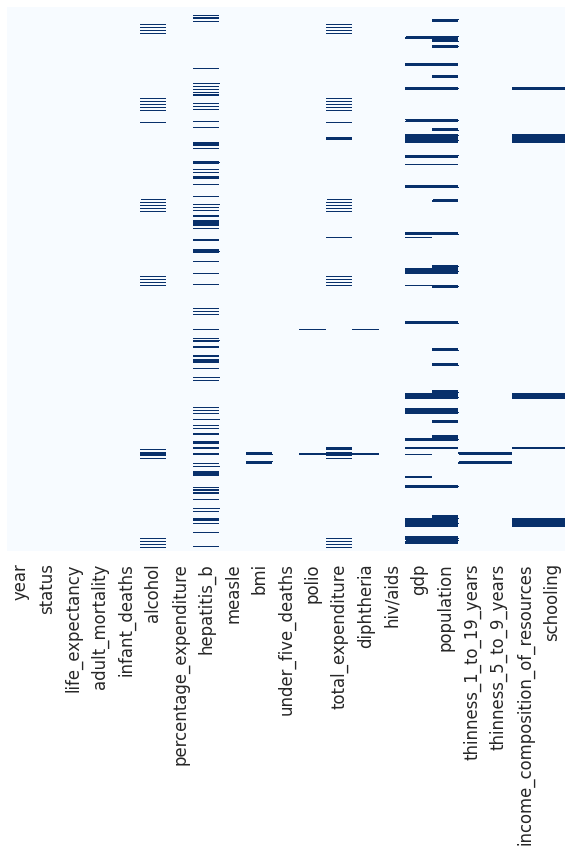

In [ ]:
# Check if there are any Null values
plt.figure(figsize=(10, 10))

# Plot a heatmap
sns.heatmap(life_expectancy_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# Statistical Summary 
life_expectancy_df.describe()

year  ...    schooling
count  2938.000000  ...  2775.000000
mean   2007.518720  ...    11.992793
std       4.613841  ...     3.358920
min    2000.000000  ...     0.000000
25%    2004.000000  ...    10.100000
50%    2008.000000  ...    12.300000
75%    2012.000000  ...    14.300000
max    2015.000000  ...    20.700000

[8 rows x 20 columns]

In [ ]:
#perform one-hot encoding
# allows representation of categorical data in a binary form for easy computation.
life_expectancy_df = pd.get_dummies(life_expectancy_df, columns = ['status'])

In [ ]:
#check the number of null values,  for the columns having null values

null_col = np.where(life_expectancy_df.isnull().sum() != 0)[0]
life_expectancy_df.isnull().sum()[null_col]

life_expectancy                     10
adult_mortality                     10
alcohol                            194
hepatitis_b                        553
bmi                                 34
polio                               19
total_expenditure                  226
diphtheria                          19
gdp                                448
population                         652
thinness_1_to_19_years              34
thinness_5_to_9_years               34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [ ]:
#since most of the are continous values we fill them with mean
life_expectancy_df = life_expectancy_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]

Series([], dtype: int64)

### Auto EDA for a better analysis

DataPrep automatically detects and highlights the insights present in the data, such as missing data, distinct count and statistics. 

It is a faster tools to perform EDA, as compared to standard libraries

In [ ]:
!pip install dataprep
from dataprep.eda import create_report

     |████████████████████████████████| 2.1 MB 5.5 MB/s 
     |████████████████████████████████| 1.1 MB 38.0 MB/s 
     |████████████████████████████████| 63 kB 2.7 MB/s 
     |████████████████████████████████| 366 kB 50.6 MB/s 
     |████████████████████████████████| 848 kB 30.6 MB/s 
     |████████████████████████████████| 943 kB 39.8 MB/s 
     |████████████████████████████████| 158 kB 50.0 MB/s 
     |████████████████████████████████| 719 kB 47.7 MB/s 
     |████████████████████████████████| 1.5 MB 39.0 MB/s 
     |████████████████████████████████| 10.1 MB 18.9 MB/s 
     |████████████████████████████████| 271 kB 47.0 MB/s 
     |████████████████████████████████| 192 kB 46.7 MB/s 
     |████████████████████████████████| 160 kB 46.4 MB/s 
     |████████████████████████████████| 132 kB 47.4 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 1.5 MB 38.6 MB/s 
     |████████████████████████████████| 743 kB 43.9 MB/s 
  Created wheel fo

My Report
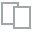
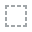
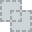
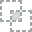
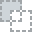
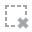
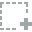
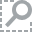
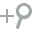
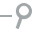
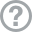
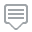
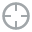
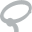
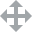
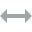
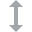
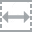
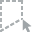
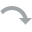
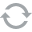
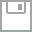
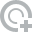
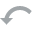
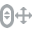
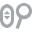
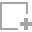
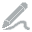
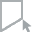
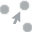
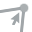
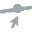

In [ ]:
#create report
report = create_report(life_expectancy_df, title='My Report')
report

### Detailed Exploration

Changing the name of the variable thinness 1-19 years to thinness 10-19 years 
would be beneficial because it is a more true representation of what the variable signifies.

In [ ]:
life_expectancy_df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

In [ ]:
life_expectancy_df.head()

year  life_expectancy  ...  status_Developed  status_Developing
0  2015             65.0  ...                 0                  1
1  2014             59.9  ...                 0                  1
2  2013             59.9  ...                 0                  1
3  2012             59.5  ...                 0                  1
4  2011             59.2  ...                 0                  1

[5 rows x 22 columns]

#### ***Some anomalies / absurdities, indicating incorrect data values:***

--An **adult mortality rate of 1 is most certainly a measurement error.** If the value falls below a specific threshold, it may be necessary to convert it to null.

--**Infant mortality rate is as low as 0 per 1000**. -- That's not conceivable, therefore I'm going to assume those values are null.

--On the other hand, 1800 is most likely an anomaly, although it is feasible in a country with extremely high birthrates and a relatively small population total - this can be addressed later.

--A BMI of 15 or below is considered severely underweight, and a BMI of 40 or above is considered morbidly obese, **many of bmi measures appear to be unrealistic**...this variable may not be worth investigating further.

--Similar to **newborn deaths, values of zero are unlikely** in the Under Five Deaths category.

--Looks **infeasible that GDP per capita could be as low as $1.68** (USD).

-- The assumption that the population of a nation is 34

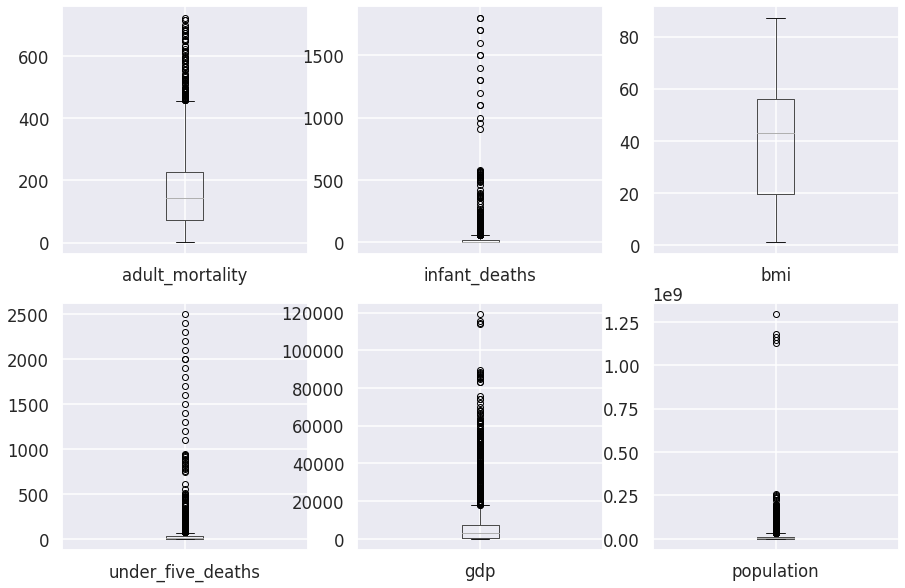

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under_five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    life_expectancy_df.boxplot(col)

Some of them could simply be outliers,  however, they do have some errors. Of the above variables, changes to null will be made for the following fields due to infeasible values:

1)**Adult mortality rates lower than the 5th percentile**

2)**Infant deaths of 0**

3)**BMI less than 10 and greater than 50**

4)**Under Five deaths of 0**

Performing the necessary changes

In [ ]:
mort_5_percentile = np.percentile(life_expectancy_df.adult_mortality.dropna(), 5)

life_expectancy_df.adult_mortality = life_expectancy_df.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
 
life_expectancy_df.infant_deaths = life_expectancy_df.infant_deaths.replace(0, np.nan)

life_expectancy_df.bmi = life_expectancy_df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)

life_expectancy_df['under_five_deaths'] = life_expectancy_df['under_five_deaths'].replace(0, np.nan)

In [ ]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   life_expectancy                  2938 non-null   float64
 2   adult_mortality                  2793 non-null   float64
 3   infant_deaths                    2090 non-null   float64
 4   alcohol                          2938 non-null   float64
 5   percentage_expenditure           2938 non-null   float64
 6   hepatitis_b                      2938 non-null   float64
 7   measle                           2938 non-null   int64  
 8   bmi                              1516 non-null   float64
 9   under_five_deaths                2153 non-null   float64
 10  polio                            2938 non-null   float64
 11  total_expenditure                2938 non-null   float64
 12  diphtheria          


It may be more useful **to perform a null-breakdown.**

The function below tries to accomplish this by only returning columns with (explicit) nulls, keeping a running total of those columns with nulls as well as their location in the dataframe, and returning the count of nulls in a given column as well as the percent of nulls out of all the values in the column.

In [ ]:
def nulls_breakdown(df=life_expectancy_df):

    # columns into a list
    life_expectancy_df_cols = list(life_expectancy_df.columns)

    # length of list
    cols_total_count = len(list(life_expectancy_df.columns))

    #column count indicator
    cols_count = 0

    for loc, col in enumerate(life_expectancy_df_cols):
        null_count = life_expectancy_df[col].isnull().sum()
        total_count = life_expectancy_df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1

            # breakdown of null values
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))

    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))


In [ ]:
nulls_breakdown()

[iloc = 2] adult_mortality has 145 null values: 4.94% null
[iloc = 3] infant_deaths has 848 null values: 28.86% null
[iloc = 8] bmi has 1422 null values: 48.4% null
[iloc = 9] under_five_deaths has 785 null values: 26.72% null
Out of 22 total columns, 4 contain null values; 18.18% columns contain null values.


### Dealing with Missing Values

Nearly **half of the BMI variable's values are null**, **it is likely best to remove this variable altogether.**

In [ ]:
life_expectancy_df.drop(columns='bmi', inplace=True)

In [ ]:
nulls_breakdown()

[iloc = 2] adult_mortality has 145 null values: 4.94% null
[iloc = 3] infant_deaths has 848 null values: 28.86% null
[iloc = 8] under_five_deaths has 785 null values: 26.72% null
Out of 21 total columns, 3 contain null values; 14.29% columns contain null values.



We will carry out imputation by year.The mean of each year is computed as follows.


In [ ]:
imputed_data = []

for year in list(life_expectancy_df.year.unique()):
    year_data = life_expectancy_df[life_expectancy_df.year == year].copy()

    for col in list(year_data.columns)[3:]:

        # using fillna() method where null values are imputed using the mean() of the year_data
        
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()

    imputed_data.append(year_data)

life_expectancy_df = pd.concat(imputed_data).copy()

In [ ]:
nulls_breakdown(life_expectancy_df)

[iloc = 2] adult_mortality has 145 null values: 4.94% null
Out of 21 total columns, 1 contain null values; 4.76% columns contain null values.


### Outliers

Outlier Detection

To visually see if there are any outliers, a boxplot and histogram will be constructed for each continuous variable.

In [ ]:
cont_vars = list(life_expectancy_df.columns)[3:]

In [ ]:
cont_vars

['infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measle',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'population',
 'thinness_1_to_19_years',
 'thinness_5_to_9_years',
 'income_composition_of_resources',
 'schooling',
 'status_Developed',
 'status_Developing']

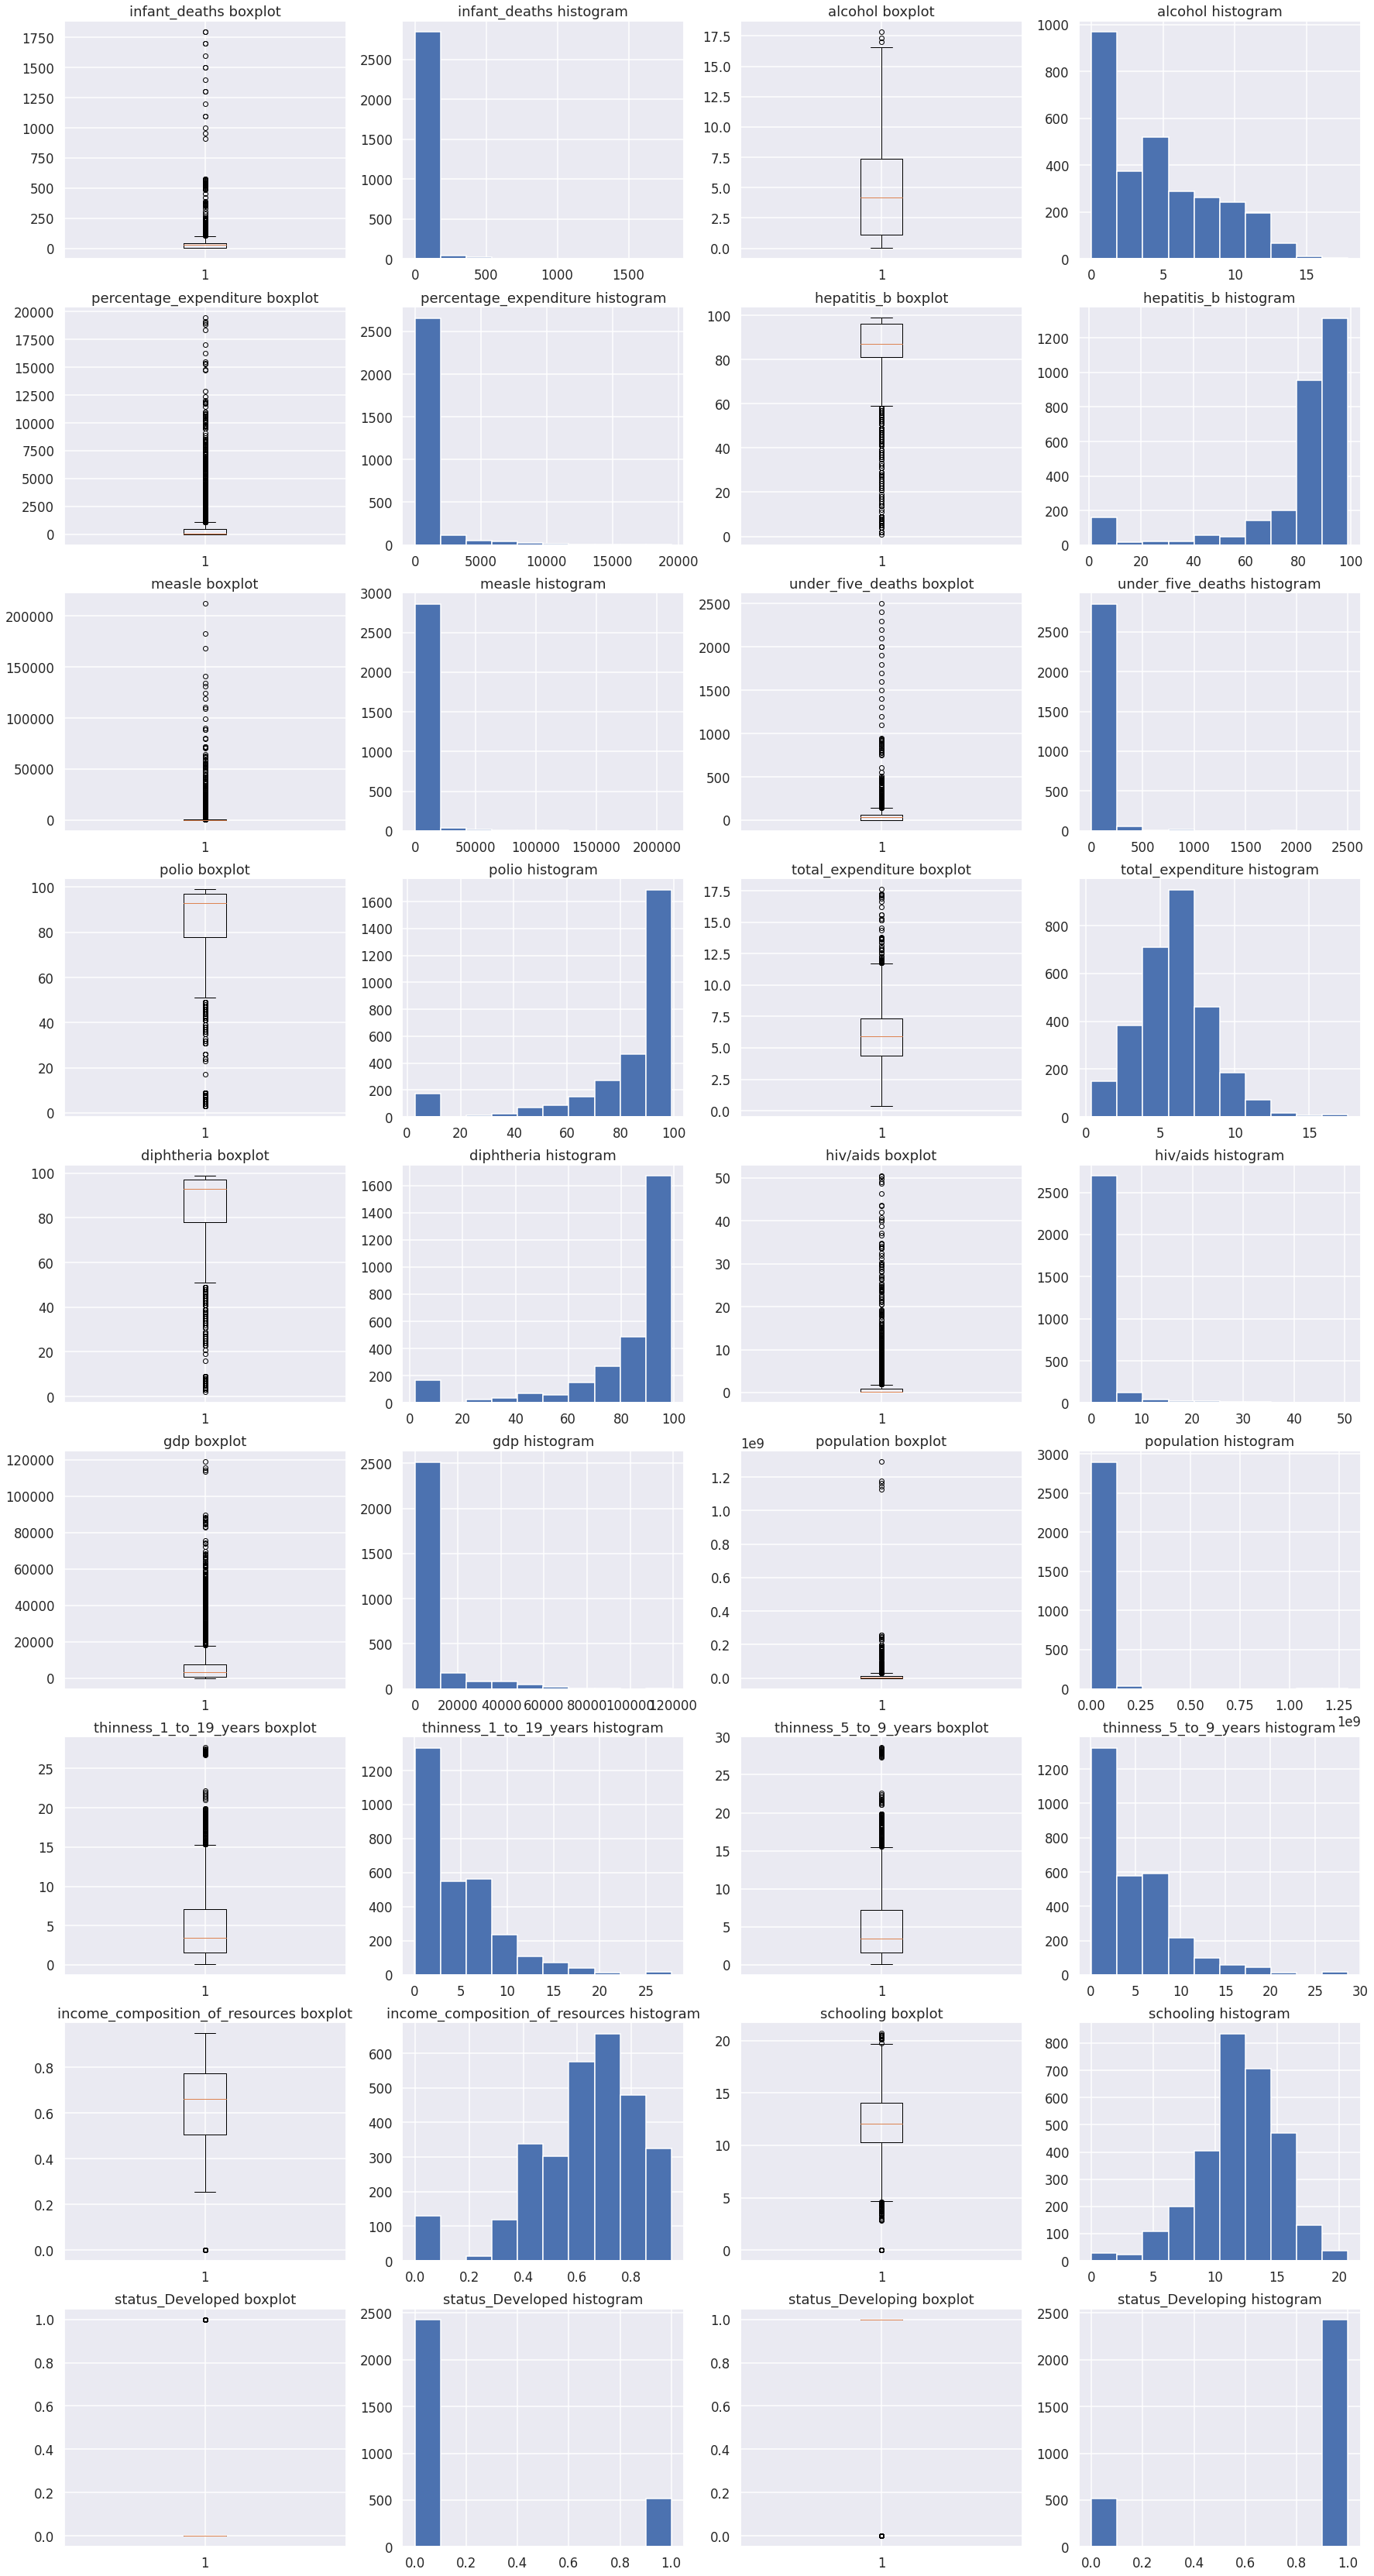

In [ ]:
# Outlier Count using histogram and boxplot

def outliers_visual(data):

    plt.figure(figsize=(30, 60))
    i = 0

    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))

    plt.show()
outliers_visual(life_expectancy_df)

**Outlier Count**

There are a lot of outliers for all of these variables, including the goal variable, life expectancy, as can be shown visually.

In [ ]:
 # Count of outliers uding Tukey Method(Statistical)

def outlier_count(col, data=life_expectancy_df):

    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])

    # inter-quartile range
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)

    # Number and percentage of outliers i.e. greater than 1.5 IQR
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [ ]:
for col in cont_vars:
    outlier_count(col)

---------------infant_deaths---------------
Number of outliers: 135
Percent of data that is outlier: 4.59%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 316
Percent of data that is outlier: 10.76%
---------------measle---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------under_five_deaths---------------
Number of outliers: 142
Percent of data that is outlier: 4.83%
---------------polio---------------
Number of outliers: 279
Percent of data that is outlier: 9.5%
---------------total_expenditure---------------
Number of outliers: 51
Percent of data that is outlier: 1.74%
---------------diphtheria---------------
Number of outliers: 298
Percent of data that is outlier: 10.14%
---------------hiv/aids---------------
Number o

It appears there are a decent amount of outliers in this dataset.

### **Dealing with Outliers**

Approach 
We will **winsorize (limit) the values** for each variable separately until no outliers remain, **since the number as well as the sides of the outliers vary for each of them.**

By default, the function will display **two boxplots for the variable** side by side (one boxplot of the original data, and one with the winsorized change). The winsorized data will be kept in the **wins dict** dictionary so that it may be conveniently retrieved later after a suitable limit has been determined.

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
def test_wins(colum, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(life_expectancy_df[colum], limits=(lower_limit, upper_limit))
    wins_dict[colum] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(life_expectancy_df[colum])
        plt.title('original {}'.format(colum))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, colum))
        plt.show()

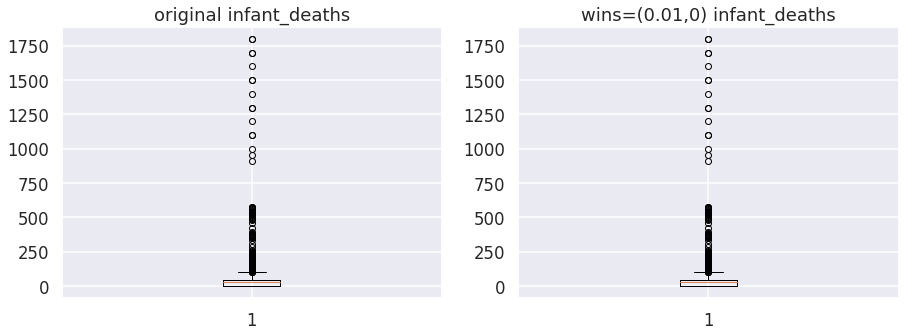

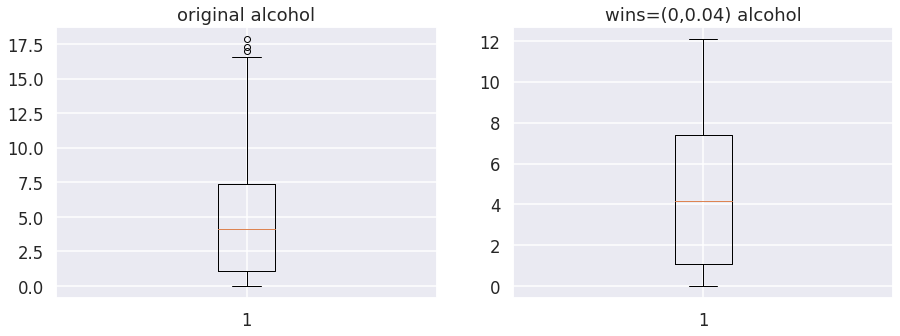

In [ ]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=True)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=False)

All of the variables have now been winsorized as little as possible in order to preserve as much data as feasible.


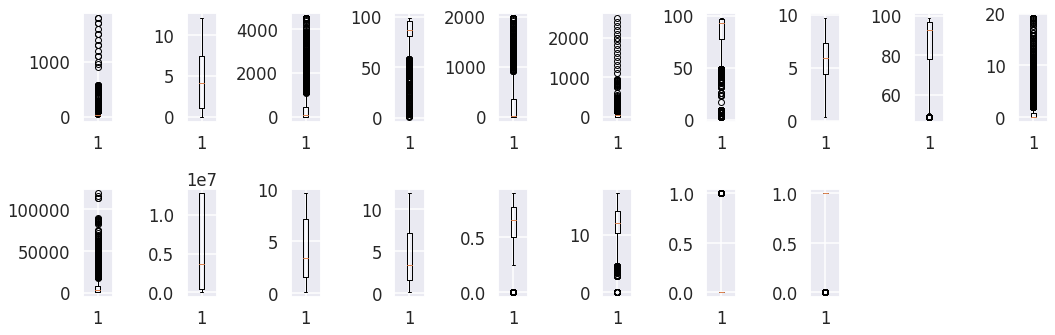

In [ ]:
plt.figure(figsize=(15,5))
for i, colum in enumerate(cont_vars, 1):
    plt.subplot(2, 10, i)
    plt.boxplot(wins_dict[colum])
plt.tight_layout()
plt.show()

In [ ]:
# winsorized df
wins_df = life_expectancy_df.iloc[:, 0:3]

for colum in cont_vars:
    wins_df[colum] = wins_dict[colum]

In [ ]:
wins_df.describe()

year  life_expectancy  ...  status_Developed  status_Developing
count  2938.000000      2938.000000  ...       2938.000000        2938.000000
mean   2007.518720        69.224932  ...          0.174268           0.825732
std       4.613841         9.507640  ...          0.379405           0.379405
min    2000.000000        36.300000  ...          0.000000           0.000000
25%    2004.000000        63.200000  ...          0.000000           1.000000
50%    2008.000000        72.000000  ...          0.000000           1.000000
75%    2012.000000        75.600000  ...          0.000000           1.000000
max    2015.000000        89.000000  ...          1.000000           1.000000

[8 rows x 21 columns]

 VISUAL DISTRIBUTIONS

In [ ]:
# correlation among variables

wins_df[cont_vars].corr()

infant_deaths  ...  status_Developing
infant_deaths                         1.000000  ...           0.057262
alcohol                              -0.066107  ...          -0.583564
percentage_expenditure               -0.065491  ...          -0.477475
hepatitis_b                          -0.162551  ...          -0.095642
measle                                0.334116  ...           0.137130
under_five_deaths                     0.995195  ...           0.064579
polio                                -0.137364  ...          -0.220372
total_expenditure                    -0.115161  ...          -0.284852
diphtheria                           -0.189740  ...          -0.262343
hiv/aids                              0.006820  ...           0.179042
gdp                                  -0.062247  ...          -0.445776
population                            0.117882  ...           0.057063
thinness_1_to_19_years                0.186011  ...           0.441676
thinness_5_to_9_years                 0.226241  ...           0.422764
income_composition_of_resources      -0.103378  ...          -0.452919
schooling                            -0.139083  ...          -0.476234
status_Developed                     -0.057262  ...          -1.000000
status_Developing                     0.057262  ...           1.000000

[18 rows x 18 columns]

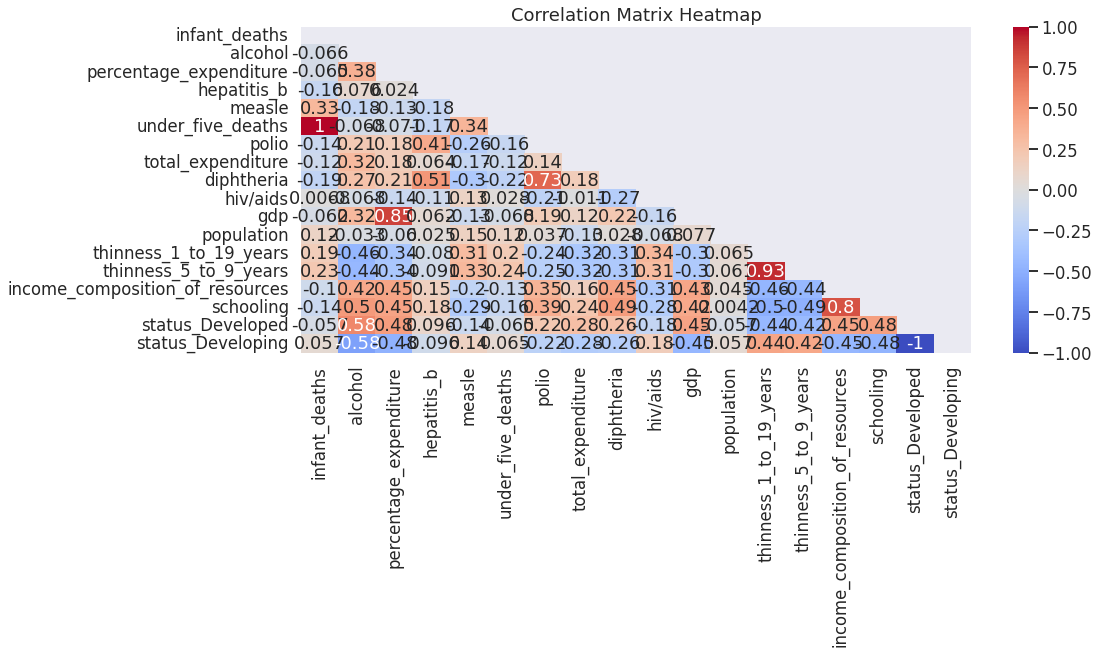

In [ ]:
# Correlation Matrix Heatmap

mask = np.triu(wins_df[cont_vars].corr())
plt.figure(figsize=(15,6))
sns.heatmap(wins_df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Some general takeaways:

**Life Expectancy (target variable) appears to be relatively highly correlated with:**
1. HIV/AIDS (negative)
2. Income Composition of Resources (positive)
3. Schooling (positive)

**Life expectancy is extremely lowly correlated to population (nearly no correlation at all)**

 --Infant deaths and Under Five deaths are extremely highly correlated.

 --Percentage Expenditure and GDP are relatively highly correlated

 **Hepatitis B vaccine rate is relatively positively correlated with Polio and Diphtheria vaccine rates**

 --Polio vaccine rate and Diphtheria vaccine rate are very positively correlated

--HIV/AIDS is relatively negatively correlated with Income Composition of Resources

--Thinness of 5-9 Year olds rate and Thinness of 10-15 Year olds rate is extremely highly correlated

**Income Composition of Resources and Schooling are very highly correlated**

In [ ]:
! pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=d9799e5c2f26825ba08f7b7cdebcd6162cebf4213d88583a25a1e2e90c4893db
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


XGBoost Model Training

In [ ]:
#MODELS
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization

In [ ]:
#METRICS
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error
from random import randrange
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# will be using the winsorised df
wins_df.head()

year  life_expectancy  ...  status_Developed  status_Developing
0   2015             65.0  ...                 0                  1
16  2015             77.8  ...                 0                  1
32  2015             75.6  ...                 0                  1
48  2015             52.4  ...                 0                  1
64  2015             76.4  ...                 0                  1

[5 rows x 21 columns]

In [ ]:
X = wins_df.drop(['life_expectancy'], axis=1)

y = wins_df.life_expectancy

# 80: 20 split 
X_train, X_test = X[:2350], X[2350:]
y_train, y_test = y[:2350], y[2350:]

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (2350, 20)
y_train:  (2350,)
X_test:  (588, 20)
y_test:  (588,)


Convert data into xgb matrix format

In [ ]:
#convert data to xgb matrix form
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test)

XGBOOST BAYESIAN OPTIMIZATION

In [ ]:
#bayesian hyper parameter tuning
#define the params

def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta' : 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    
    cv_result = xgb.cv(params, dtrain, num_boost_round=250,  nfold=3)    
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]


In [ ]:
#run optimizer
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3,7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)
                                             })
#define iter points
xgb_bo.maximize(init_points=10, n_iter=15, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -2.185    |  0.3049   |  0.7587   |  3.913    |
|  2        | -1.871    |  0.8087   |  0.7264   |  6.564    |
|  3        | -1.88     |  0.7803   |  0.5203   |  5.386    |
|  4        | -1.984    |  0.42     |  0.1308   |  4.184    |
|  5        | -1.874    |  0.7074   |  0.3976   |  5.8      |
|  6        | -1.877    |  0.7618   |  0.565    |  5.576    |
|  7        | -1.905    |  0.4845   |  0.04239  |  6.11     |
|  8        | -1.924    |  0.8994   |  0.3742   |  4.453    |
|  9        | -1.939    |  0.6488   |  0.7652   |  4.141    |
|  10       | -2.079    |  0.7407   |  0.3959   |  3.512    |
|  11       | -1.957    |  0.3      |  1.0      |  7.0      |
|  12       | -1.855    |  0.9      |  0.0      |  7.0      |
|  13       | -1.918    |  0.9      |  1.0      |  4.589    |
|  14       | -1.871    |  0.9      |  1.0      |  7.0      |
|  15   

In [ ]:
#get the best parameters
params = xgb_bo.max['params']
params['max_depth'] = int(round(params['max_depth']))

#train the data
model = xgb.train(params, dtrain, num_boost_round=250)

In [ ]:
#predict the test data 
predictions = model.predict(dtest)

COMPARISON OF TRUE VALUE AND XGBOOST PREDICTIONS

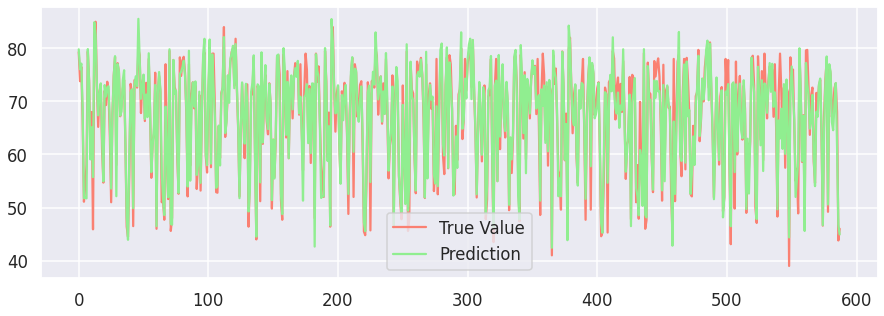

In [ ]:
y_val = life_expectancy_df.life_expectancy[2350:]
plt.figure(figsize=(15, 5))
sns.set_style('darkgrid')
plt.plot(np.arange(len(y_val)), y_val, color='salmon');
plt.plot(np.arange(len(y_val)), predictions, color='lightgreen');
plt.legend(['True Value', 'Prediction']);

In [ ]:
xgb_mae = mean_absolute_error(y_val, predictions)
xgb_mse = mean_squared_error(y_val, predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_val, predictions))

print('Mean Absolute Error:   ', xgb_mae)
print('Mean Squared Error:   ', xgb_mse)
print('Root Mean Squared Error:   ', xgb_rmse)

Mean Absolute Error:    1.8505193372972968
Mean Squared Error:    7.22570733452667
Root Mean Squared Error:    2.6880675836977517


MEAN ABSOLUTE PERCENTAGE ERROR

In [ ]:
xgb_error_rate = abs(((y_val - predictions) / y_val).mean()) * 100
print('MAPE:', round(xgb_error_rate,2), '%')

MAPE: 0.01 %


R-SQUARED SCORE

In [ ]:
print('R2-SCORE: ', r2_score(y_val, predictions))

R2-SCORE:  0.9301546841152987


MONTE CARLO SIMULATION

In [ ]:
#function that can generate a monte carlo simulation  

from scipy.stats import norm

def monte_carlo_simulation(data,t_intervals ,iteration , figsize = (10,4), lw=1):

    #log returns of data
    log_returns = np.log(1 + data.pct_change())

    #Setting up the drift and random component
    mean_  = log_returns.mean()
    var = log_returns.var()
    stdev = log_returns.std()
    drift = mean_ - (0.5 *var)

    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iteration)))

    S0 = data.iloc[-1]

    #Empty daily returns
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0

    #appliying montecarlo simulation
    for i in range(1 , t_intervals):
        price_list[i] = price_list[i-1] * daily_returns[i]
    fig_title = str(t_intervals)+ ' DAYS SIMULATION WITH ' +str(iteration)+' DIFFERENT POSSIBILITIES'

    #Show the result of 30 days simulation
    plt.figure(figsize=figsize)
    plt.plot(price_list, lw=lw)
    plt.title(fig_title)
    plt.xlabel('Years', fontsize=16)
    plt.ylabel('Life Expectancy', fontsize=16)


In [ ]:
#fit the X_train and show the figure
monte_carlo_simulation(y_train,30,20, figsize=(13,6))

NameError: ignored